# Assn06:  Machine Learning Challenge

___

### Goal:

To use both **preprocessing** and **dimensionality reduction** to improve your machine learning results from "Final Project Proposal 2" (FPP-2).

<br>

___

### Instructions:

<br>

Section 1:  

* Copy the **"Machine learning result"** section from your submitted **FPP-2**.
* Ensure that the code is executable:
    * It must run without errors
    * It must reproduce the results from FPP-2

<br>

Section 2:  

* Use ONLY **preprocessing** and **dimensionality reduction** to improve upon your FPP-2 results.
    * You must use the identical supervised / unsupervised learning procedures as those in FPP-2
    * The ONLY differences must include: (a) the addition of **preprocessing** and **dimensionality reduction**, and (b) improved results

<br>

Section 3:  

* Summarize your changes
* Explain why you think these changes improved performance
* Modify the "Summary of Changes" cell at the end of this Notebook


<br>
<br>
<br>

⭐ HINT!

If you use PCA for dimensionality reduction, use [fit_transform](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) to apply a PC transform to the original data, like this:

In [ ]:
from sklearn.decomposition import PCA

pca   = PCA(n_components=2)
x_new = pca.fit_transform(x)

<br>
<br>

___

<br>
<br>

___

## Section 1:  Machine learning result (ORIGINAL)

(Copy-and-paste the "Machine Learning Result" section from your submitted FPP-2 here)

In [2]:
# Importing libraries
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [3]:
# Loading and preparing data
# Load CSV data using PandaS
df      = pd.read_csv( 'energydata_complete.csv', delimiter=',', parse_dates = True , index_col = 0 )

# Check null values
for c in df.isna().sum():
    assert c == 0

# drop random variables in the data sets
df.drop(columns = ["rv1", "rv2"], inplace = True)

# Resample it to hourly data
df = df.resample("H").mean()

# Calulate the total load (appliances + lights) and drop columns = ["Appliances", "lights"]
df["total"] = df["Appliances"] + df["lights"]
df.drop(columns = ["Appliances", "lights"], inplace = True)

variables = df.drop(columns = ["total"])
variable_names = {"T1" : "Temperature in kitchen area",
                  "RH_1" :  "Humidity in kitchen area",
                  "T2" : "Temperature in living room area", 
                  "RH_2" : "Humidity in living room area",
                  "T3" : "Temperature in laundry room area",
                  "RH_3" : "Humidity in laundry room area",
                  "T4" : "Temperature in office room",
                  "RH_4" : "Humidity in office room", 
                  "T5" : "Temperature in bathroom",
                  "RH_5" :  "Humidity in bathroom",
                  "T6" : "Temperature outside the building (north side)",
                  "RH_6" : "Humidity outside the building (north side)",
                  "T7" :  "Temperature in ironing room",
                  "RH_7" : "Humidity in ironing room",
                  "T8" : "Temperature in teenager room 2",
                  "RH_8" : "Humidity in teenager room 2",
                  "T9" : "Temperature in parents room",
                  "RH_9" : "Humidity in parents room",
                  "T_out" : "Temperature outside",
                  "Press_mm_hg" : "from Chievres weather station",
                  "RH_out" : "Humidity outside", 
                  "Windspeed" : "from Chievres weather station",
                  "Visibility" : "from Chievres weather station",
                  "Tdewpoint" : "from Chievres weather station"}
failed_to_reject = []
for column in variables:
    results = stats.linregress(df[column], df["total"])
    p = results.pvalue
    if p > 0.05:
        failed_to_reject.append(column)  

# Drop IV columns which fail to reject the null hypothesis
df.drop(columns = failed_to_reject, inplace = True)

Baseline MAE: 58.39
Training MAE: 48.64


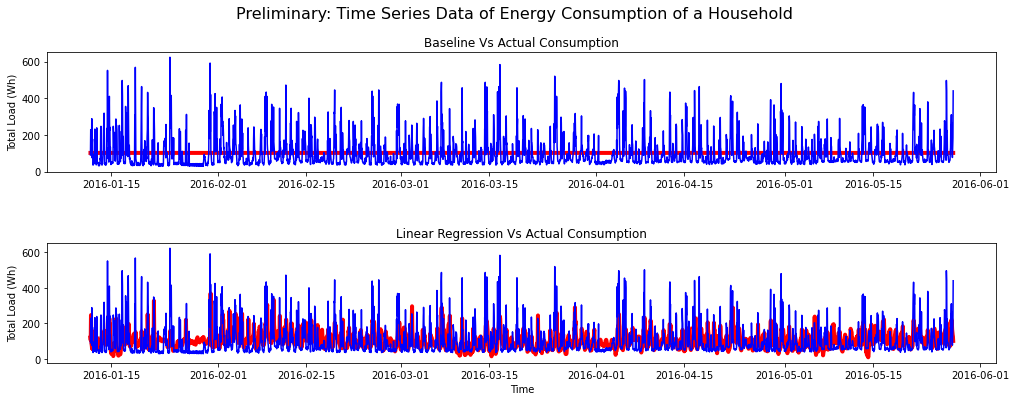

In [4]:
# Define feature and target values
X_train = df.drop(columns = ["total"])
y_train = df["total"]

# Compute baseline mean absolute error to compare
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline MAE:", round(mae_baseline, 2))

#Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the total load 
y_pred_training = model.predict(X_train)

# Compute the model mean absolute error 
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

fig,ax = plt.subplots(2,1,figsize = (15,6) )
fig.tight_layout(pad=5.0)
ax[0].plot(pd.Series(y_pred_baseline, index = y_train.index), "red", linewidth = 4)
ax[0].plot(y_train, "blue")
ax[0].set_ylabel("Total Load (Wh)")
ax[0].set_title("Baseline Vs Actual Consumption")
ax[1].plot(pd.Series(y_pred_training, index = y_train.index), "red", linewidth = 4)
ax[1].plot(y_train, "blue")
ax[1].set_ylabel("Total Load (Wh)")
ax[1].set_xlabel("Time")
ax[1].set_title("Linear Regression Vs Actual Consumption")
fig.suptitle("Preliminary: Time Series Data of Energy Consumption of a Household", fontsize = 16)
plt.show()

<br>
<br>
<br>

___

## Section 2:  Machine learning result (NEW)

(Use ONLY **preprocessing** and **dimensionality reduction** to improve the ORIGINAL results above.)

In [5]:
# Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [6]:
# Finding the optimum PC for the model
n_test = range(1, 17, 1)
mae_list = []
for n in n_test:
    #Initiating PCA
    pca   = PCA(n_components=n)
    pca.fit(X_train_scaled)
    X_train_pca = pca.transform(X_train_scaled)
    
    #Initiating Linear Regression Model
    model_new = LinearRegression()
    model_new.fit(X_train_pca, y_train)
    
    #Predicting using the model
    y_pred_training_pca = model_new.predict(X_train_pca)
    
    # Calculating the mean absolute error
    mae_training_pca = mean_absolute_error(y_train, y_pred_training_pca)
    mae_list.append(mae_training_pca)

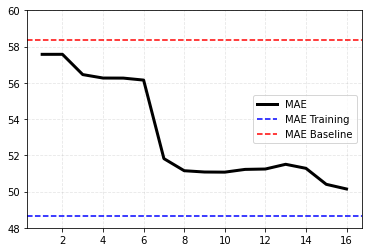

In [7]:
# Plotting the mean absolute error and n_components of PCA
plt.plot(n_test, mae_list, "k", linewidth = 3, label = "MAE")
plt.axhline(mae_training, color = "b", linestyle = "--", label = "MAE Training")
plt.axhline(mae_baseline, color = "r", linestyle = "--", label = "MAE Baseline")
plt.ylim(48, 60)
plt.grid(linestyle = "--", alpha = 0.3)
plt.legend()
plt.show()

Training MAE: 51.15


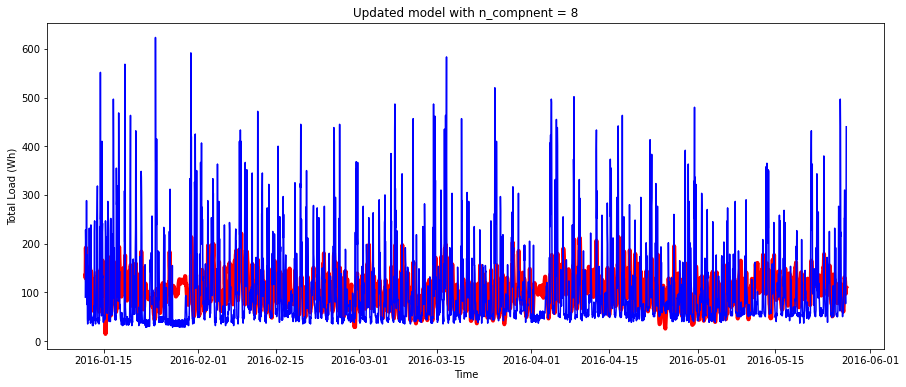

In [8]:
# New Machine Learning result as an example
pca_n8 = PCA(n_components= 8)
pca_n8.fit(X_train_scaled)
X_train_pca_n8 = pca_n8.transform(X_train_scaled)
model_n8 = LinearRegression()
model_n8.fit(X_train_pca_n8, y_train)


# Predict the total load 
y_pred_training_pca_n8 = model_n8.predict(X_train_pca_n8)

# Compute the model mean absolute error 
mae_training = mean_absolute_error(y_train, y_pred_training_pca_n8)
print("Training MAE:", round(mae_training, 2))

plt.figure(figsize = (15, 6))
plt.plot(pd.Series(y_pred_training_pca_n8, index = y_train.index), "red", linewidth = 4)
plt.plot(y_train, "blue")
plt.xlabel("Time")
plt.ylabel("Total Load (Wh)")
plt.title("Updated model with n_compnent = 8")
plt.show()

<br>
<br>
<br>

___

## Section 3:  Summary of Changes

#### Preprocessing

* StandardScaler from sklearn is used to scale the features to unit variance

#### Dimensionality reduction

* Principle component analysis is used to reduce the dimensionality from 1 to 16 componenets (< than the total number of X_train)

#### Results

* In my preliminary machine learning results, I've already the exclude the features with low correlation.
* After checking the evolution of mean absolute effor after PCA, it doesn't beat the training (preliminary result). Therefore it is better to keep the original features as it loses the ease of interpretability when I perform dimenstionality reduction.
* However, machine learning result for the PCA n_components = 8 is used to illustrate as an example.

Very good aplication of both scaling and PCA

Excellent consideration of the effects of n_components on the results!

One problem is that the model may be too simple; the LinearRegression model will generally not improve with PC-based dimensionality reduction. Nonlinear methods like SVR are expected to improve more, so please consider using SVR in your Final Project.

Also for your Final Project, ensure that you create separate training and test sets; the training performance is informative but the test set performance is more important

Very well done!